In [46]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn import metrics

In [ ]:
# Read and clean results
results = pd.read_csv('../data/test-gpt3.csv')

# Drop rows with no GPT prediction
results = results[results['gptTrue'].notnull()]

# Generate numerical flags for argmax prediction
results['humanBinary'] = results['humanLabel'].replace({'True': 1, 'False': 0}).astype(int)
results['gptBinary'] = results.apply(lambda x: 1 if x.gptTrue > x.gptFalse else 0, axis=1)

Analyzing the results of our first 700 predictions through the GPT-3 API. These results do not include any of the major techniques for improving performance on classification tasks, such as data cleaning, fine tuning, hyperparameter search, prompt engineering, evidence gathering, or reward learning.  

Therefore, these results should be understood as a proof-of-concept and a minimum baseline for future classification performance. 

**Labeling Note:**
* "True" means "not misleading"
* "False" means "misinformed or potentially misleading"

In [40]:
# Preview
results.head()

,noteId,tweetText,humanLabel,gptTrue,gptFalse,gptUnknown,humanBinary,gptBinary
0,1376590348382650000,Military's Tracking: \n\n#Trump WON w/ 80 Mill...,False,0.358771,0.634336,0.006892,0,0
1,1387895055076050000,"I didn't gain any ""Pandemic Pounds""\nBecause I...",False,0.730130,0.265472,0.004397,0,1
2,1499792671505880000,"Breaking: Zelensky, after saying he would not ...",False,0.505845,0.490933,0.003221,0,1
3,1392540253676660000,@ronparsell @foxnewsradio @OMAHAGEMGIRL Trump ...,False,0.181402,0.814347,0.004251,0,0
4,1375524397394480000,@EduCelebrity Unnecessary. Covid doesn't sprea...,False,0.286257,0.709813,0.003930,0,0


In [42]:
print("Unweighted Accuracy: " + str(metrics.accuracy_score(results['humanBinary'].values, results['gptBinary'].values)))

Unweighted Accuracy: 0.4322396576319544


In [44]:
print("Average GPT Probability by Human Label")
results.groupby('humanLabel').agg({'gptTrue': 'mean',
                                   'gptFalse': 'mean'})

Average GPT Probability by Human Label


,gptTrue,gptFalse
humanLabel,,
False,0.522169,0.473849
True,0.612201,0.384037


Marginally better than random classifier on ROC Curve


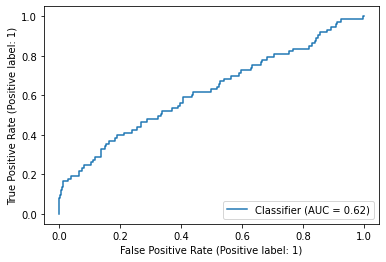

In [55]:
print('Marginally better than random classifier on ROC Curve')
metrics.RocCurveDisplay.from_predictions(results['humanLabel'], results['gptTrue'])